In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data from CSV file into a pandas dataframe
df = pd.read_csv("webdev5.csv")

# Convert the 'date' column to datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

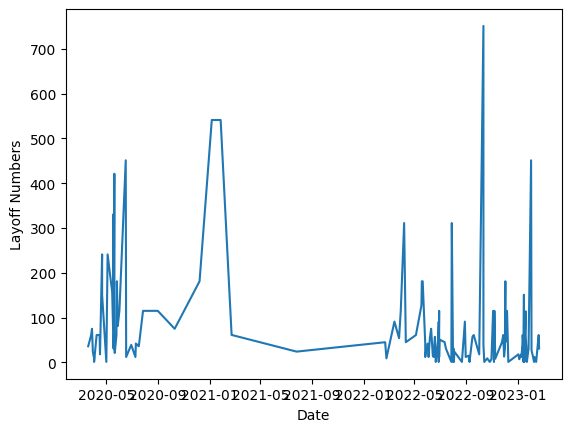

In [6]:
# Visualize the data using a line plot
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Layoff Numbers')
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

# ADF test function
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Check the stationarity of the data using the ADF test
adf_test(df['laid_off'])


ADF Statistic: -10.15433023854905
p-value: 7.801352479489062e-18
Critical Values:
   1%: -3.477261624048995
   5%: -2.8821181874544233
   10%: -2.5777431104939494


In [9]:
# First-order differencing to make the data stationary
diff = df['laid_off'].diff().dropna()

# Check the stationarity of the differenced data
adf_test(diff)


ADF Statistic: -6.4517039877146205
p-value: 1.517822336847948e-08
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is availab

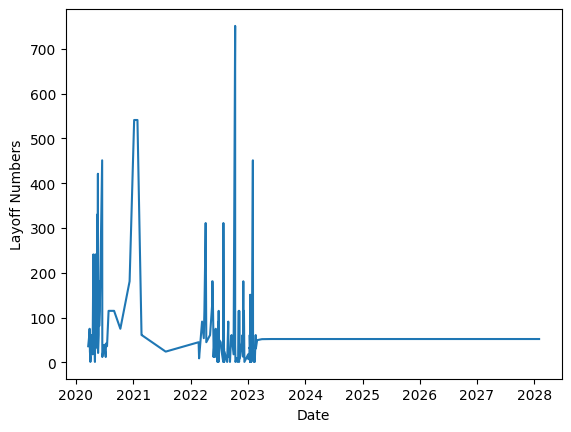

In [12]:
# Fit an ARIMA model to the data
model = ARIMA(df['laid_off'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions for the next 5 years
future_dates = pd.date_range(start='2023-03-01', end='2028-02-28', freq='MS')
future_predictions = model_fit.predict(start=len(df), end=len(df)+59, typ='levels', freq='MS')

# Create a dataframe of the future predictions
future_df = pd.DataFrame({'date': future_dates, 'laid_off': future_predictions})
future_df.set_index('date', inplace=True)

# Concatenate the original dataframe and the future predictions dataframe
forecast_df = pd.concat([df, future_df])

# Visualize the forecasted data using a line plot
plt.plot(forecast_df)
plt.xlabel('Date')
plt.ylabel('Layoff Numbers')
plt.show()

